In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from tqdm import tqdm
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\week _6\crediTrust-rag-chatbot\data\raw\complaints.csv')
print(f"Dataset shape: {df.shape}")
df.head()

C:\Users\bless\AppData\Local\Temp\ipykernel_19516\4025596031.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\week _6\crediTrust-rag-chatbot\data\raw\complaints.csv')


Dataset shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [3]:
required_products = [
    "Credit card", 
    "Personal loan", 
    "Buy Now, Pay Later", 
    "Savings account", 
    "Money transfer, virtual currency"
]

filtered_df = df[df['Product'].isin(required_products)]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()]


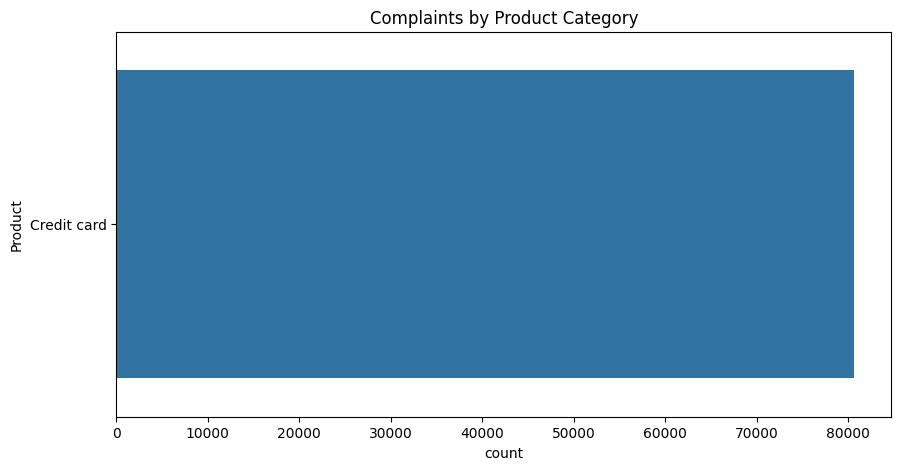

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(y='Product', data=filtered_df)
plt.title('Complaints by Product Category')
plt.show()

In [5]:
filtered_df['word_count'] = filtered_df['Consumer complaint narrative'].apply(lambda x: len(nltk.word_tokenize(str(x))))
filtered_df['word_count'].describe()

count    80667.000000
mean       219.735282
std        244.213365
min          2.000000
25%         69.000000
50%        155.000000
75%        286.000000
max       6914.000000
Name: word_count, dtype: float64

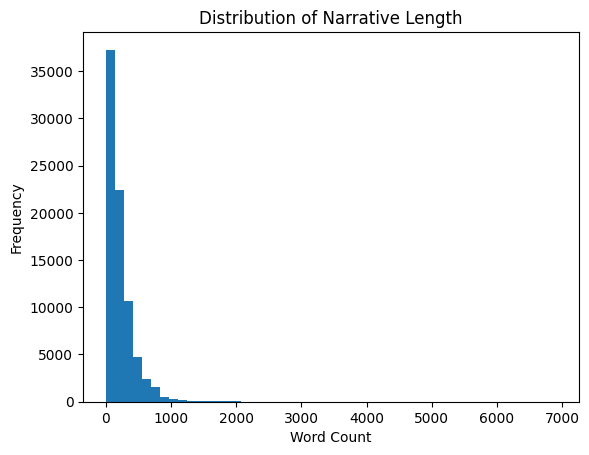

In [6]:
plt.hist(filtered_df['word_count'], bins=50)
plt.title('Distribution of Narrative Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

tqdm.pandas()
filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].progress_apply(clean_text)


100%|██████████| 80667/80667 [00:12<00:00, 6350.27it/s]


In [8]:
filtered_df[['Product', 'cleaned_narrative']].to_csv(r'C:\Users\bless\OneDrive\Desktop\week _6\crediTrust-rag-chatbot\data\filtered\filtered_complaints.csv', index=False)
